In [43]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

In [44]:
num_values = 500
import random
my_randoms = [round(random.uniform(-10, 10),2) for x in range(num_values)]


## Create Table with two columns (Speed and Age) which are inversely correlated



In [45]:

actual_age = beta.rvs(2, 2 ,loc=30, scale=30, size=num_values)
actual_age = np.add(actual_age, my_randoms)

actual_speed = gamma.rvs(a = 10, loc=10, scale=5, size=num_values)
actual_speed = np.add(actual_speed, my_randoms)

          
correlation_dict = {'speed': sorted(actual_speed),
                      'age': np.sort(actual_age)[::-1] } 

df = pd.DataFrame.from_dict(correlation_dict) 

In [46]:
df.head(10)

,speed,age
0,23.074947,65.719487
1,23.667284,65.415826
2,23.990208,64.832325
3,25.021382,64.492235
4,25.675582,64.222252
5,25.733951,64.152392
6,26.387787,64.142254
7,26.463187,64.100075
8,29.193211,64.096505
9,29.259412,63.821198


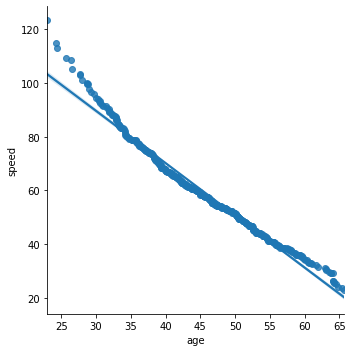

In [47]:
sns.lmplot(x ='age', y ='speed', data = df)

# Problem 1. Capture variation within a column

Fitting a Beta Distribution to the Age column

In [49]:
age_a, age_b, age_loc, age_scale = beta.fit(df.age)


## Generate new synthetic Age column from beta parameters


In [50]:
synthetic_age_beta = beta.rvs(age_a, age_b ,loc=age_loc,scale=age_scale,size=len(df.age))

## Difference between actual vs synthetic Age column

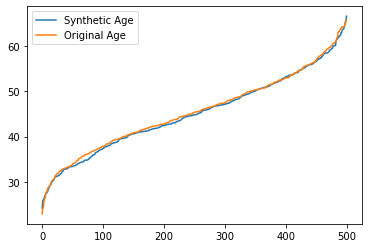

In [51]:
plt.plot(sorted(synthetic_age_beta), label='Synthetic Age')
plt.plot(sorted(df.age), label='Original Age')
plt.legend()
plt.show()

 Fit gamma to original speed column


In [52]:
speed_a, speed_loc, speed_scale = gamma.fit(df.speed)

# Problem 2. Capture variation between columns

Covariance and Correlation

Covariance = measure if elements from two arrays move in the same direction

correlation = normalized covariance (always between -1 and 1)

Off-diagonal entries are almost -1 because columns are inversely correlated

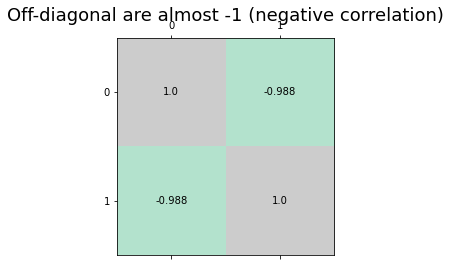

In [53]:
fig, ax = plt.subplots()

ax.matshow(df.corr().values, cmap=plt.cm.Pastel2)
ax.set_title('Off-diagonal are almost -1 (negative correlation)', fontsize=18)

for i in range(2):
    for j in range(2):
        c = round(df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

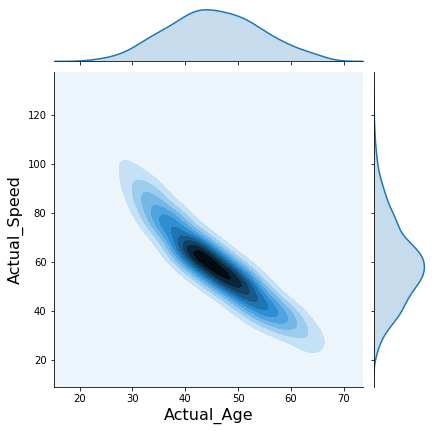

In [54]:
h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);

# Problem 3. Generate synthetic data

## 3.1 create a Gaussian Copula using the Correlation matrix of above table (df.corr)

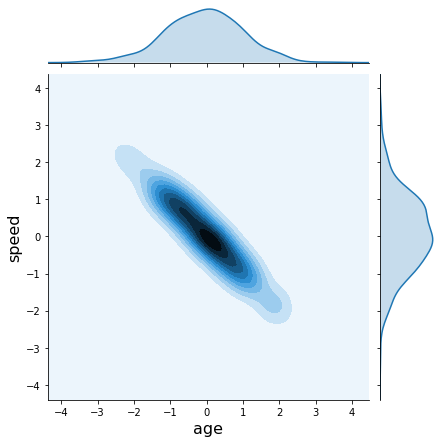

In [55]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=df.corr().values)
x = mvnorm.rvs(num_values)

h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('age', 'speed', fontsize=16);

## 3.2 modify the Copula to have the original Age and Speed distributions

ppf = inverse of CDF

In [56]:
norm = stats.norm()
x_unif = norm.cdf(x)

age_distribution = stats.beta(a=age_a, b=age_b, loc=age_loc, scale=age_scale)  # Age column

speed_distribution = stats.gamma(a=speed_a, loc=speed_loc,scale=speed_scale)

age_ppf = age_distribution.ppf(x_unif[:, 0])

speed_ppf = speed_distribution.ppf(x_unif[:, 1])

## 3.3 create Synthetic Table which looks same as original

In [57]:
synthetic_df = pd.DataFrame({ 'speed' : speed_ppf, 'age' : age_ppf})
synthetic_df = synthetic_df.sort_values('speed')

## How the synthetic data looks 

In [58]:
synthetic_df.head(10)

,speed,age
282,16.789307,68.935326
425,21.460175,66.875972
342,25.930157,64.979165
339,27.128736,64.105231
71,27.519261,61.311214
437,28.221134,61.019521
366,28.738076,63.175295
15,29.885991,61.259112
284,30.015117,59.857121
246,30.275661,61.749608


## Notice : correlation matrix is almost same as the original covariance above


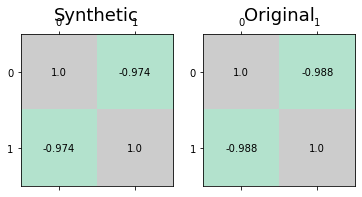

In [59]:

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(synthetic_df.corr().values, cmap=plt.cm.Pastel2)
ax1.set_title('Synthetic', fontsize=18)

for i in range(2):
    for j in range(2):
        c = round(synthetic_df.corr().values[j,i], 3)
        ax1.text(i, j, str(c), va='center', ha='center')
        
ax2.matshow(df.corr().values, cmap=plt.cm.Pastel2)
ax2.set_title('Original', fontsize=18)

for i in range(2):
    for j in range(2):
        c = round(df.corr().values[j,i], 3)
        ax2.text(i, j, str(c), va='center', ha='center')

Text(0.5, 0.98, 'Original')

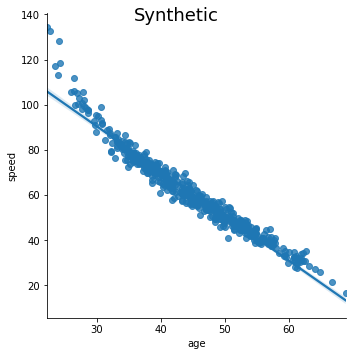

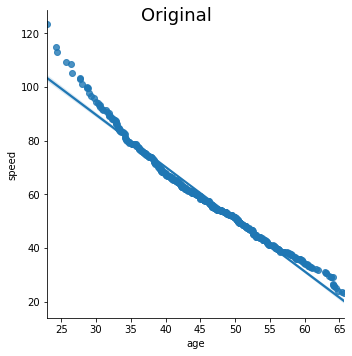

In [60]:
lm=sns.lmplot(x ='age', y ='speed', data = synthetic_df)
fig = lm.fig 
fig.suptitle("Synthetic", fontsize=18)

lm=sns.lmplot(x ='age', y ='speed', data = df)
fig = lm.fig 
fig.suptitle("Original", fontsize=18)

## The original and synthetic data have same dependence 

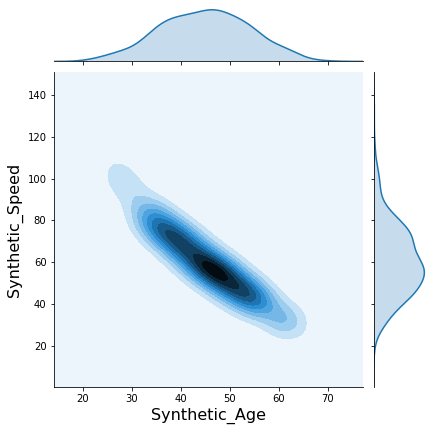

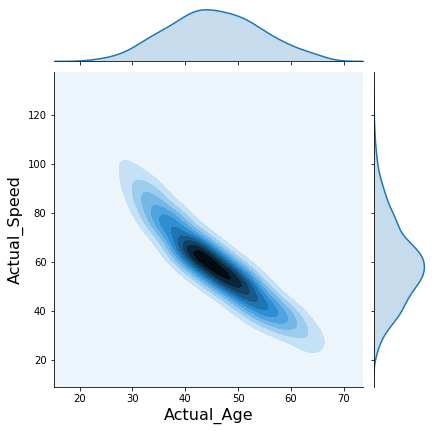

In [61]:

h = sns.jointplot(synthetic_df.age, synthetic_df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Synthetic_Age', 'Synthetic_Speed',  fontsize=16);

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);